<a href="https://colab.research.google.com/github/yohanesnuwara/mem/blob/master/02_overburden_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Data

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Access Google Drive to get data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

46 LAS files from Norne Field.

In [4]:
import glob
import os

file_path = "/content/drive/My Drive/Colab Notebooks/well_logs"
read_files = glob.glob(os.path.join(file_path, "*.las"))
read_files

['/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-1BH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-E-2AH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-1AHT2.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-K-1HT2.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-1H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-2H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-3H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4AH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4BH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4CH.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4DHT2.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-B-4H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-C-1H.las',
 '/content/drive/My Drive/Colab Notebooks/well_logs/660810-C-2H.las',
 '/cont

Get the name of the well from the file.

In [0]:
well_names = []

for files in read_files:
  files = os.path.splitext(os.path.basename(files))[0]
  well_names.append(files)

In [6]:
well_names

['660810-B-1BH',
 '660810-E-2AH',
 '660810-B-1AHT2',
 '660810-K-1HT2',
 '660810-B-1H',
 '660810-B-2H',
 '660810-B-3H',
 '660810-B-4AH',
 '660810-B-4BH',
 '660810-B-4CH',
 '660810-B-4DHT2',
 '660810-B-4H',
 '660810-C-1H',
 '660810-C-2H',
 '660810-C-3H',
 '660810-C-4AH',
 '660810-C-4H',
 '660810-D-1AH',
 '660810-D-1BH',
 '660810-D-1CH',
 '660810-D-1H',
 '660810-D-2HT2',
 '660810-D-3AH',
 '660810-D-3BY1HT2',
 '660810-D-3BY2H',
 '660810-D-3H',
 '660810-D-4AH',
 '660810-D-4AHT2',
 '660810-D-4H',
 '660810-E-1H',
 '660810-E-2H',
 '660810-E-3AH',
 '660810-E-3AHT2',
 '660810-E-3BH',
 '660810-E-3CHT2',
 '660810-E-3H',
 '660810-E-4AH',
 '660810-E-4AHT2',
 '660810-E-4H',
 '660810-E-4HT2',
 '660810-F-1H',
 '660810-F-2H',
 '660810-F-3H',
 '660810-F-4H',
 '660810-K-1H',
 '660810-K-3H']

If the well name too long, shorten it by renaming it.

In [0]:
well_names = np.array(well_names)
wellnames = np.array(['B1BH', 'E2AH', 'B1AHT2', 'K1HT2',
                      'B1H', 'B2H', 'B3H', 'B4AH',
                      'B4BH', 'B4CH', 'B4DHT2', 'B4H',
                      'C1H', 'C2H', 'C3H', 'C4AH',
                      'C4H', 'D1AH', 'D1BH', 'D1CH',
                      'D1H', 'D2HT2', 'D3AH', 'D3BY1HT2',
                      'D3BY2H', 'D3H', 'D4AH', 'D4AHT2',
                      'D4H', 'E1H', 'E2H', 'E3AH',
                      'E3AHT2', 'E3BH', 'E3CHT2','E3H',
                      'E4AH', 'E4AHT2', 'E4H','E4HT2',
                      'F1H', 'F2H', 'F3H', 
                      'F4H','K1H', 'K3H'])

Import `lasio` library to import LAS data

In [8]:
!pip install lasio

In [0]:
import lasio

Read LAS file (if command: `Header section Parameter regexp=~P was not found.`, it's OK)

In [10]:
lases = []

for files in read_files:
    las = lasio.read(files)
    lases.append(las)

Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


## Well catalogue
Input the name of the well you want to view in the `find` and check what data is present.

In [11]:
wellnames

array(['B1BH', 'E2AH', 'B1AHT2', 'K1HT2', 'B1H', 'B2H', 'B3H', 'B4AH',
       'B4BH', 'B4CH', 'B4DHT2', 'B4H', 'C1H', 'C2H', 'C3H', 'C4AH',
       'C4H', 'D1AH', 'D1BH', 'D1CH', 'D1H', 'D2HT2', 'D3AH', 'D3BY1HT2',
       'D3BY2H', 'D3H', 'D4AH', 'D4AHT2', 'D4H', 'E1H', 'E2H', 'E3AH',
       'E3AHT2', 'E3BH', 'E3CHT2', 'E3H', 'E4AH', 'E4AHT2', 'E4H',
       'E4HT2', 'F1H', 'F2H', 'F3H', 'F4H', 'K1H', 'K3H'], dtype='<U8')

In [12]:
# type the numbers from 0 to 45 in the wellames[...]
find = wellnames[0]
# print the name of the searched well
print("Well name:", find)
id_ = np.int64(np.where(wellnames==find)).item()
print("Data available:", lases[id_].keys())
# check more details
print("Detail about data:")
print(lases[id_].curves)

Well name: B1BH
Data available: ['DEPTH', 'TVD', 'TVDSS', 'GR', 'KLOGH', 'NPHI', 'PHIF', 'RHOB', 'SW', 'VSH']
Detail about data:
Mnemonic  Unit         Value    Description                            
--------  ----         -----    -----------                            
DEPTH     M                     Measured Depth                         
TVD       M                     True Vertical Depth (TVD)              
TVDSS     M                     True Vertical Depth (TVDSS)            
GR        API          UNKNOWN  GR:UNKNOWN:rC::v0 (auto-composite)     
KLOGH     mD           UNKNOWN  KLOGH:UNKNOWN:rC::v0 (auto-composite)  
NPHI      v/v_decimal  UNKNOWN  NPHI:UNKNOWN:rC::v0 (auto-composite)   
PHIF      v/v_decimal  UNKNOWN  PHIF:UNKNOWN:rC::v0 (auto-composite)   
RHOB      g/cm3        UNKNOWN  RHOB:UNKNOWN:rC::v0 (auto-composite)   
SW        v/v_decimal  UNKNOWN  SW:UNKNOWN:rC::v0 (auto-composite)     
VSH       v/v_decimal  UNKNOWN  VSH:UNKNOWN:rC::v0 (auto-composite)    


Data RHOB of well: B1BH


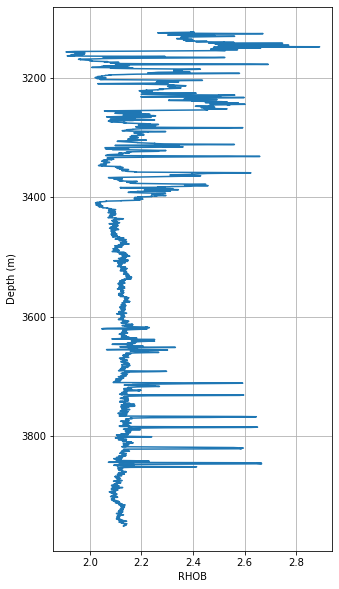

In [13]:
# peek or overviewing the well log

# which data you want to see
data_view = 'RHOB'

print("Data", data_view, "of well:", find)

plt.figure(figsize=(5,10))
plt.plot((lases[id_][data_view]), (lases[id_]['DEPTH']))
plt.xlabel(data_view); plt.ylabel("Depth (m)")
plt.grid(True)
plt.gca().invert_yaxis()

## Data Preproc


### Data cleanup for NaN values

In [14]:
# convert to panda
df = pd.DataFrame({"Depth": (lases[id_]['DEPTH']), "RHOB": (lases[id_][data_view])})
# look up the number of rows with NaN data
print("Original size of data:", len(df), "rows")
print("How many data with NaN values?")
print(df.isnull().sum())

# drop rows with missing values
df.dropna(inplace=True)
# re-index dataframe
df = df.reset_index(drop=True)
print("NaN has successfully been deleted")
df

Original size of data: 6743 rows
How many data with NaN values?
Depth      0
RHOB     122
dtype: int64
NaN has successfully been deleted


,Depth,RHOB
0,3123.438,2.3994
1,3123.563,2.3916
2,3123.688,2.4017
3,3123.813,2.4041
4,3123.938,2.3952
...,...,...
6616,3950.438,2.1311
6617,3950.563,2.1306
6618,3950.688,2.1306
6619,3950.813,2.1293


### Data Interpolation

Water column is 380 m (Norne Field wikipedia)

Density interpolated to depth 0 to 350 m with rho water 1 g/cc and from seabed at depth 350 m to the density value at depth of first recorded. 

In [15]:
# create average density (dummy) value from the sea surface (z = 0) to seabed 
depth_seabed = np.arange(0, 370, 10) # depth to seabed 350 m
rho_seabed = np.full(len(depth_seabed), 1) # create numpy array of constant water density values 1 g/cc

# depth from seabed to first recorded depth
depth_first_recorded = df.Depth[0]

depth_surface = np.linspace(360, depth_first_recorded, 100) 
d1 = 360; d2 = depth_first_recorded
rho1 = 1; rho2 = df.RHOB[0]

# interpolation function to connect from seabed to first recorded depth: rho = (((rho2 - rho1) * (depth - 1000)) + 1) / (d2 - d1)
rho_surface = (((rho2 - rho1) * (depth_surface - d1)) / (d2 - d1)) + 1

# append data
depth_dummy = np.append(depth_seabed, depth_surface)
rhob_dummy = np.append(rho_seabed, rho_surface)
df_dummy = pd.DataFrame({"Depth": depth_dummy, "RHOB": rhob_dummy})

df_new = df_dummy.append(df, ignore_index = True)
df_new

,Depth,RHOB
0,0.000,1.0000
1,10.000,1.0000
2,20.000,1.0000
3,30.000,1.0000
4,40.000,1.0000
...,...,...
6753,3950.438,2.1311
6754,3950.563,2.1306
6755,3950.688,2.1306
6756,3950.813,2.1293


### Visualize Data after Preproc

Data RHOB of well: B1BH


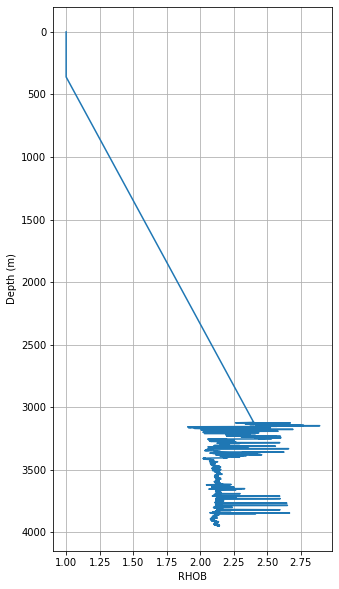

In [16]:
print("Data", data_view, "of well:", find)

plt.figure(figsize=(5,10))
plt.plot(df_new.RHOB, df_new.Depth)
plt.xlabel(data_view); plt.ylabel("Depth (m)")
plt.grid(True)
plt.gca().invert_yaxis()

## Overburden Stress Calculation

### It will calculate and save into individual well only, so in the code `sv...` below give index that matches with the current index of `wellnames[...]`. For example well `B1BH` with `wellnames[0]`, Sv is `sv0`; well `K3H` with `wellnames[45]`, so Sv is `sv45`. 

In [0]:
# convert panda to numpy
depth_np = np.array(df_new.Depth)
rhob_np = np.array(df_new.RHOB)
rhob_np_conv = rhob_np * 1E+03 # convert g/cm3 to kg/m3

thickness = np.array([j-i for i, j in zip(depth_np[:-1], depth_np[1:])])
thickness = np.append([(min(depth_np) - 0)], thickness)

# multiply rhob by thickness
rhogz = rhob_np_conv * thickness * 9.8 # rhob already in kg/m3 * thickness m2, result in Pa
rhogz = rhogz * 0.000145038 # convert Pa to psi

"cumulative sum, calculate Sv, here you must CHANGE the index of sv: sv0, sv1, ..., sv45"
sv0 = np.cumsum(rhogz)

Calculated vertical stress of well: B1BH


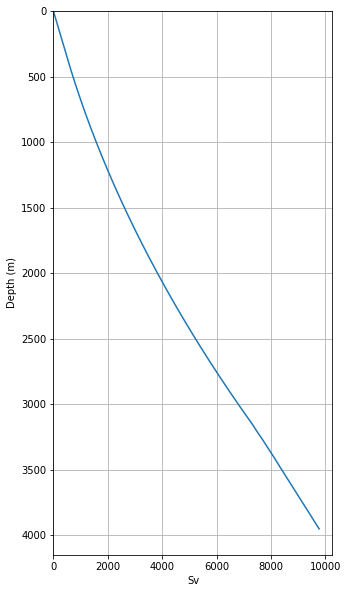

In [18]:
print("Calculated vertical stress of well:", find)

plt.figure(figsize=(5,10))
plt.plot(sv0, depth_np)
plt.xlabel("Sv"); plt.ylabel("Depth (m)")
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.grid(True)
plt.gca().invert_yaxis()